# Dynamical system learning
This notebook is dedicated to the analysis of the dynamical system layer for time series learning. The model is defined by
$$\hat{y}_{t+1}=G_H(\hat{y}_t),$$
where $G_H$ with weights $H=[H_1, H_2]$ defined by
$$G_H(y)=H_1y+\phi_{H_2}(y)$$
where $\phi_{H_2}$ is the quadratic form in $y.$ 

The organization of this notebook is the following:
- Pendulum
    - Running model
    - Model analysis with noise
- Lorenz attractor
    - Running model
    - Model analysis with noise.
    
The pendulum and the Lorenz attractor are the simulated dynamical system to test the model. First, we run the model on the dataset by adding step-by-step complexities. Then we add noise to the data and simulate the model forty times with different values of selected hyperparameters and analyze how the model behaves with noise.

# Implementation
Most of the implementations are already performed in other py-files delivered with this notebook but we use the py-files dedicated to the run of the model such as ``run_pendulum.py`` and ``run_lorenz.py`` For the simulation part with the noise, we use ``sim.py``

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

from grid_search import boxplot_feature

## Pendulum
We recall that the pendulum model is described by 
$$y_{t+1}=Hy_t,$$
where $H$ is the $(2\times 2)-$matrix weight defined by
$$H=
\begin{pmatrix}
1 &1\\
-k &1
\end{pmatrix}
$$
and the quadratic part has a $0$-weight and $k$ and is some constant and we set $k=0.01,$ and initial condition $y_0=(1,0.99).$

### Running model
We test the model on the pendulum data set. We initialize the weight in the model with values from zero-mean Gaussian distribution with variance $\sigma^2=0.01.$ First, we omit the quadratic parts.

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  simple_pendulum


training pendulum with simple linear model:
Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[ 0.6925, -0.6848],
        [-0.1960, -0.5621]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.9987,  0.9927],
        [-0.0100,  1.0000]], requires_grad=True)]


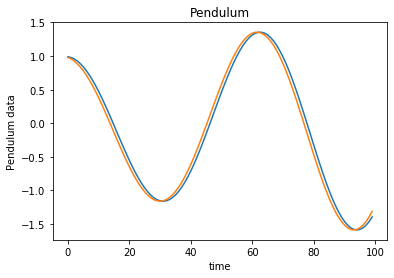

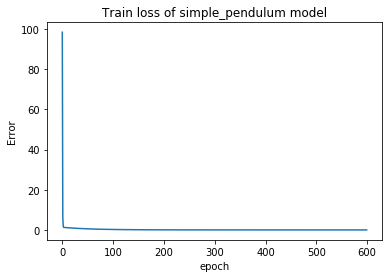

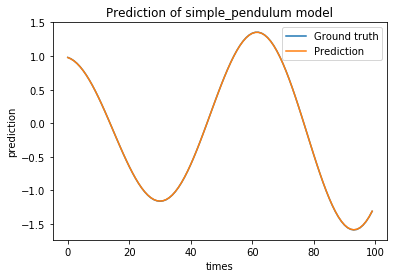

In [2]:
#set model_name=simple_pendulum
import run_pendulum

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  pendulum_bias


training pendulum model with bias:
Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[-0.5563,  0.0160],
        [ 0.3340,  0.0777]], requires_grad=True), Parameter containing:
tensor([-0.2806,  0.3245], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.9910,  0.9958],
        [-0.0098,  1.0000]], requires_grad=True), Parameter containing:
tensor([-0.0057, -0.0012], requires_grad=True)]


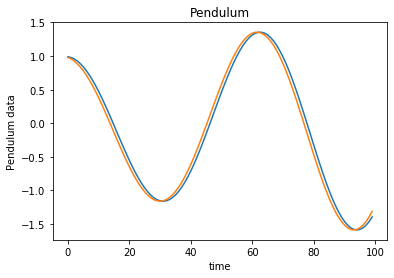

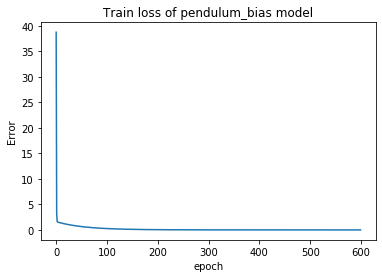

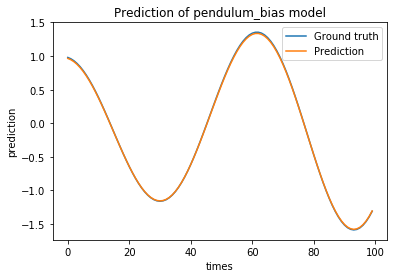

In [2]:
#set model_name=pendulum_bias
import run_pendulum

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  pendulum_batch_10


training pendulum model with batch size 10:
Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[ 0.3189,  0.5622],
        [ 0.3088, -0.2255]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]], requires_grad=True)]


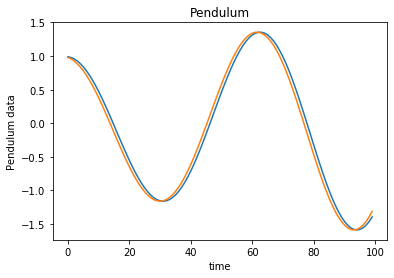

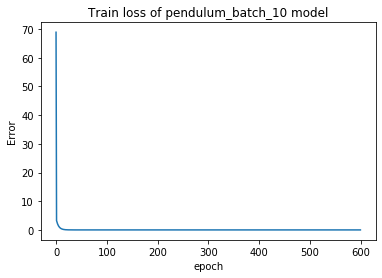

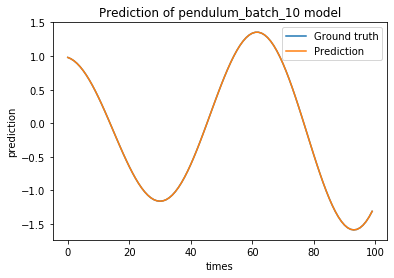

In [3]:
#set model_name=pendulum_batch_10
import run_pendulum

With these three runs, we observe that the model with the best convergence is the one with batch of size $10$ and the less accuracte is the model with the bias. Then the linear dynamical system layer can be validated. The next step is to add the quadratic term. 

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  non_lin_pendulum


Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[-0.0524,  0.0210],
        [-0.0460, -0.0845]], requires_grad=True), Parameter containing:
tensor([[[-2.9797e-05, -7.1611e-04],
         [-2.2105e-04, -9.6266e-04]],

        [[ 1.9218e-04,  8.4212e-04],
         [-3.8288e-04,  4.7217e-04]]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.8205,  0.3823],
        [-0.0101,  0.8151]], requires_grad=True), Parameter containing:
tensor([[[-0.0663,  0.0025],
         [ 0.0030,  0.0002]],

        [[-0.0830, -0.0017],
         [-0.0030,  0.0063]]], requires_grad=True)]


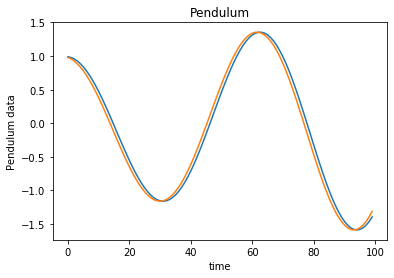

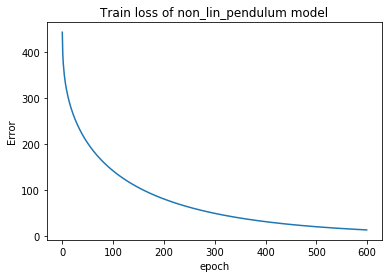

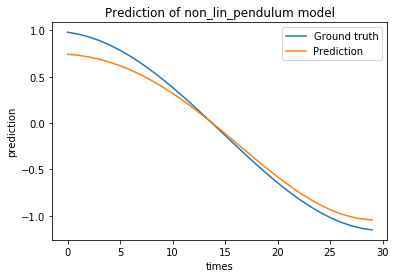

In [2]:
#set model_name=non_lin_pendulum
import run_pendulum

We observe that the model with the quadratic terms is still converging to the pendulum system, however, it only converged in a short term, if we look further, the model explode, this is due to the quadratic term that grows exponentially.

### Model analysis with noise
In this part, we analyze the behaviour of the model with noisy pendulum data. We perform forty simulations of the model with different values of selected hyperparameters. Since we add Gaussian with zero-mean and $\sigma^2-$variance.

The selected hyperparameters with their values are:
   - Noise variance in $\{0, 0.1, 0.2, 0.3, 0.4, 0.5\}$
   - Number of iterations/epochs in $\{200, 500, 1000\}$
   - Batch size in $\{10, 50, 100\}$
   
In the forty simulations, we iterate also on the different values of the selected hyperparameters. At each simulation, we take the minimum of three measurement of the model accuracy:
   - The loss function value: $L(W)=||\hat{y} - y||_F^2,$
   - The tensor norm of the linear part: $||\hat{H}_1-H_1||_F^2,$
   - The tensor norm of the quadratic part: $||\hat{H}_2-H_2||_F^2,$
   
the terms with " ^ " are the fitted values by the models.

In [ ]:
#If no csv files run this (TAKE A LOT OF TIME)
#set data_name = pendulum
import sim

In [2]:
#import csv-files if it exists
path_gen = '../gen_data/'
grid_df_pend = pd.read_csv(path_gen + 'pend_df_1000.csv')

For the first simulation, we fix the number of epoch at $1000$ and the batch size at $10$ and we observe how the three accuracy measurement vary as a function of the noise variance.

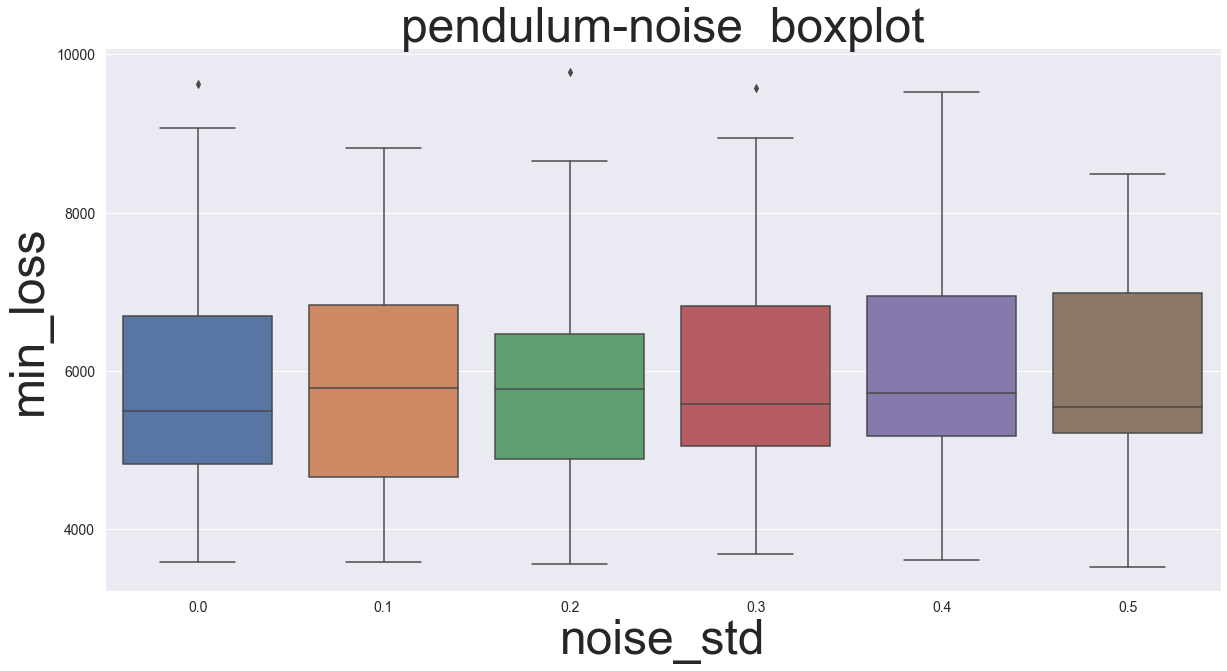

In [4]:
boxplot_feature(data=grid_df_pend, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='min_loss', save_fig=True, name='pend_loss_noise', data_name='pendulum-noise ')

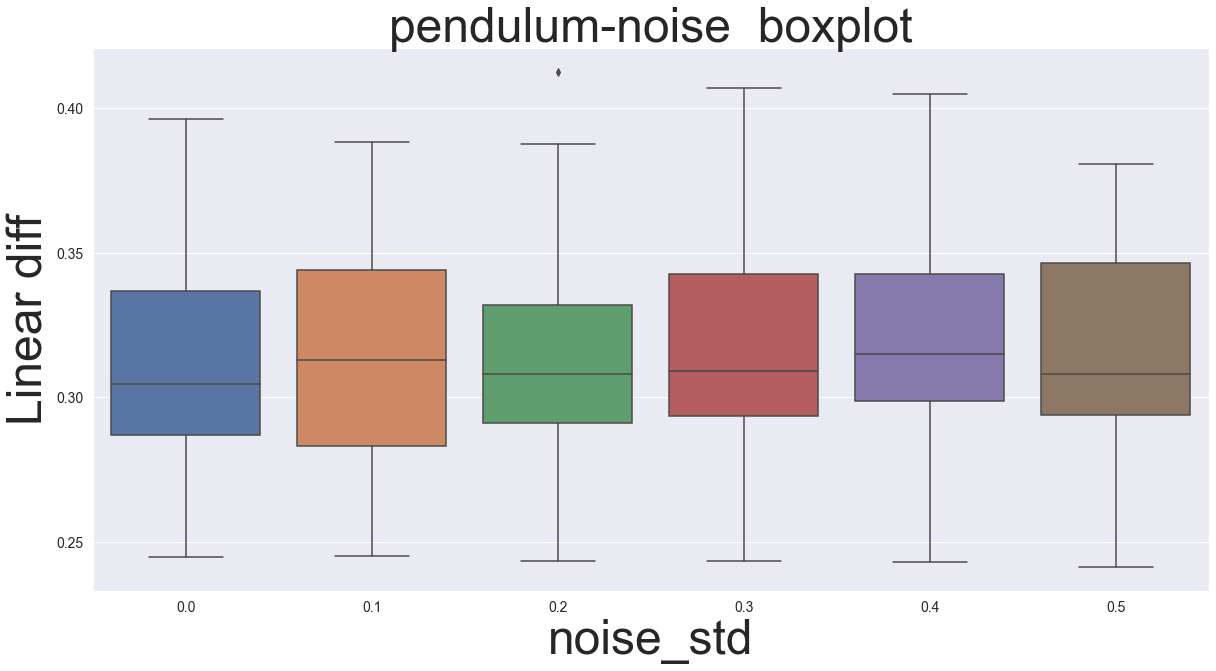

In [5]:
boxplot_feature(data=grid_df_pend, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Linear diff', save_fig=True, name='pend_lin_noise', data_name='pendulum-noise ')

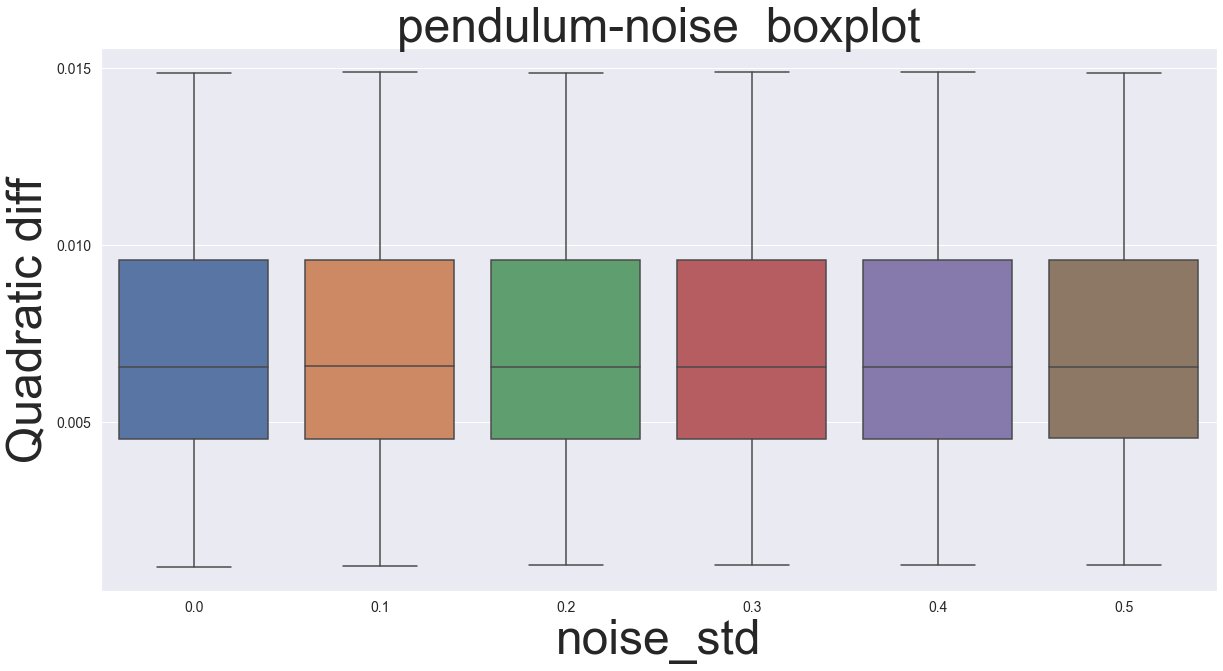

In [6]:
boxplot_feature(data=grid_df_pend, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Quadratic diff',  save_fig=True, name='pend_quad_noise', data_name='pendulum-noise ')

First of all, we observe that the measure with the quadratic term is constant, which is not surprising since we have a linear dynamical system, for the two other feature, there are some trends. The minimum of each measure increases if we add noise with small variance and stabilize or deacrese after some variance value and then increase again, which means that the noise plays a role of regularizer for the model.

It is also interesting to fix the noise and take the accuracy measurement as a function of other features such as the number of feature. First, we plot the measurement as a function of the number of iteration and we fix the noise variance at $0.2$ and batch size $10.$

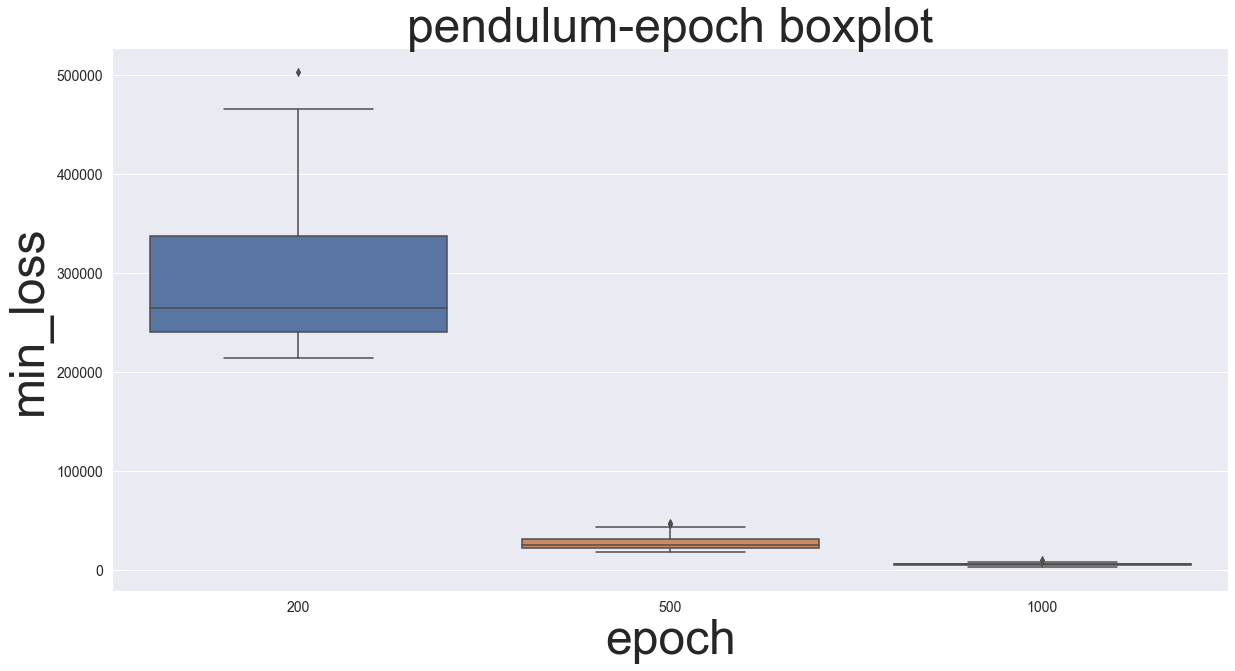

In [10]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='min_loss', save_fig=True, name='pend_loss_ep', data_name='pendulum-epoch')

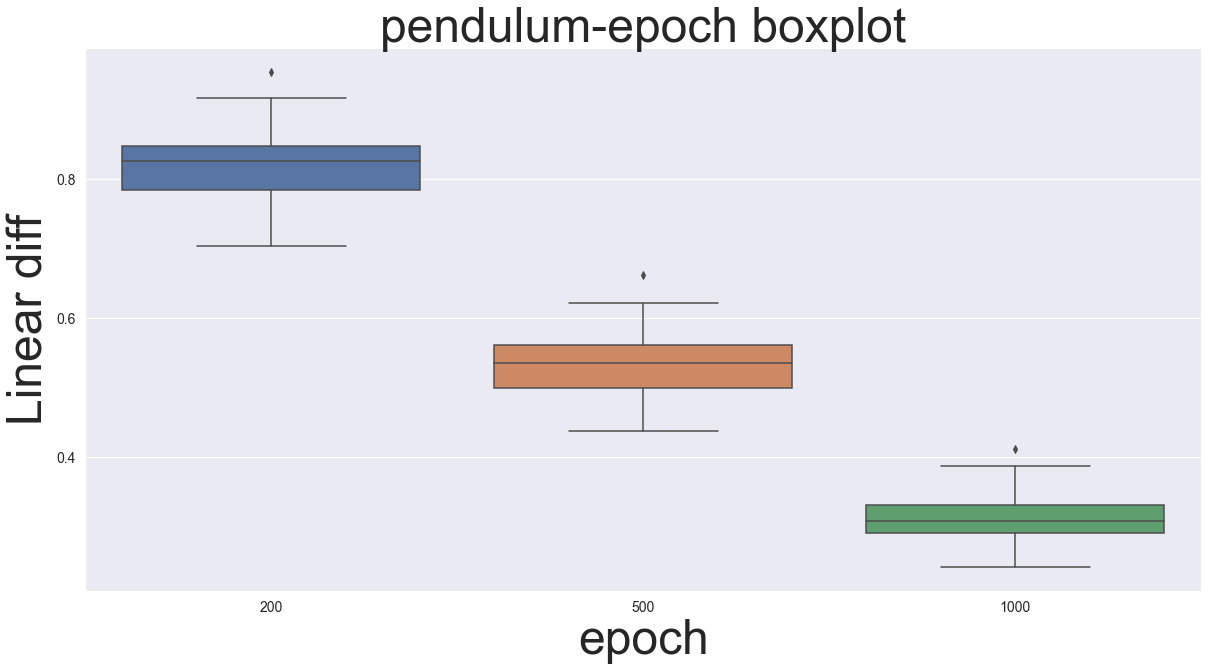

In [11]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Linear diff', save_fig=True, name='pend_lin_ep', data_name='pendulum-epoch')

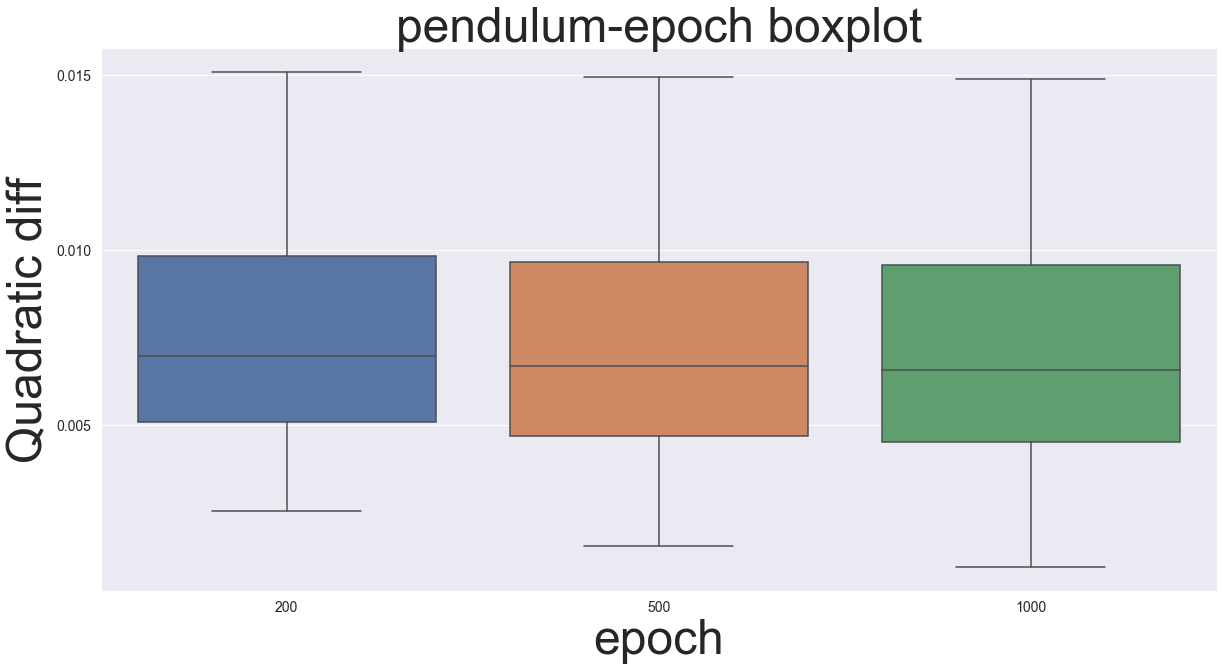

In [12]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Quadratic diff', save_fig=True, name='pend_quad_ep', data_name='pendulum-epoch')

For the linear difference, it is not surprising that the minimum loss value decreases as a function of the number of iterations/epochs. The difference for the linear part as a function of the number of iteration is also decreasing. It is the same observation for the quadratic difference but the decreasing trends is less obvious. This is due to the linearity of the pendulum dynamical system.

We choose the noise with variance $0.2$ and we observe that the model seems not to be influenced by the noise, then it is coherent with the plot of the accuracy measurement as function of the noise variance.

For the last analysis, we study the accuracy measurement as function of the batch size by fixing the nois variance at $0.2$ and the number of iterations at $1000.$

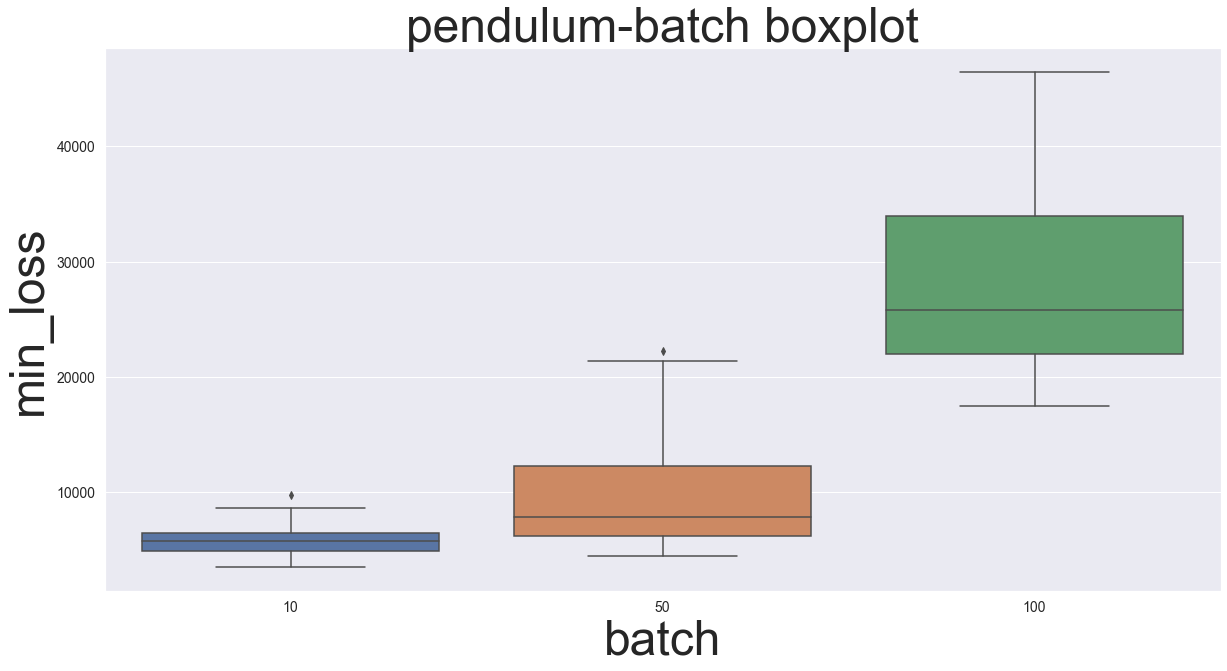

In [13]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='min_loss', save_fig=True, name='pend_loss_bs', data_name='pendulum-batch')

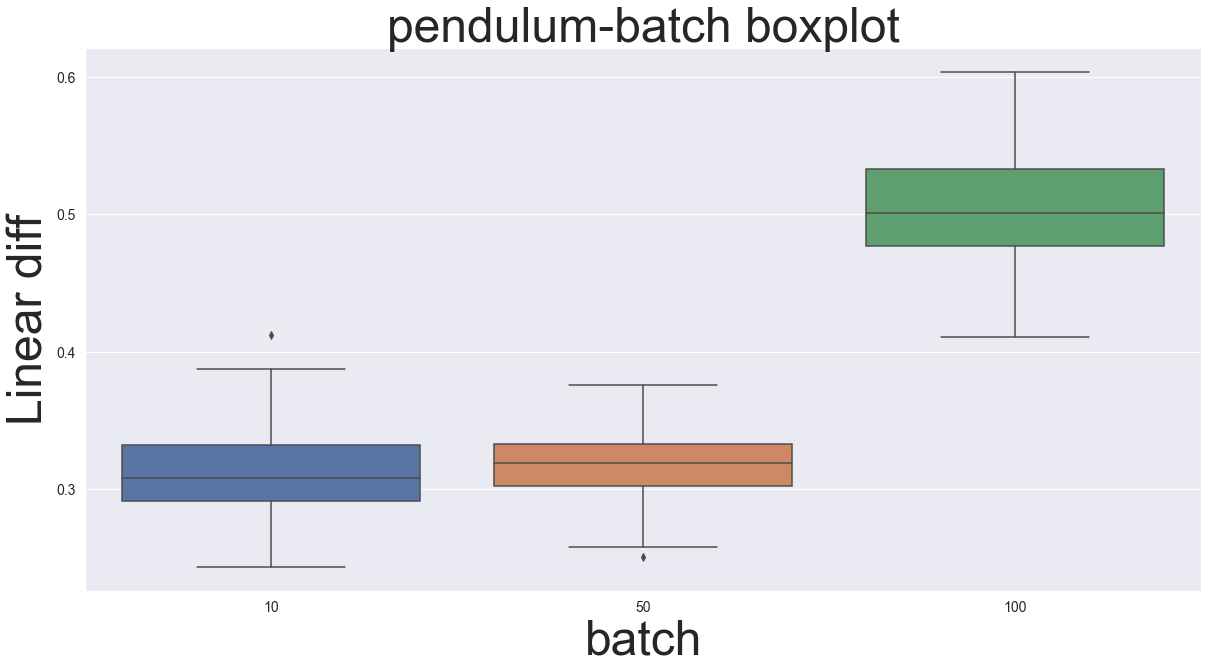

In [14]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Linear diff', save_fig=True, name='pend_lin_bs', data_name='pendulum-batch')

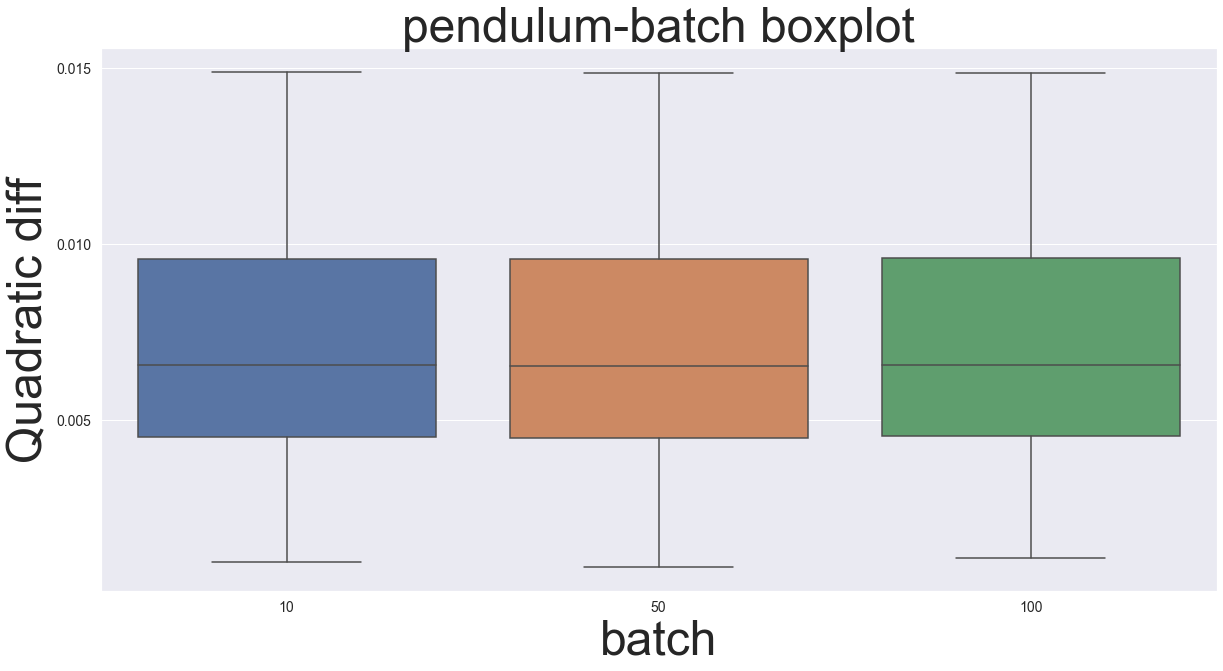

In [15]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Quadratic diff', save_fig=True, name='pend_quad_bs', data_name='pendulum-batch')

The loss and the linear difference as function of the batch size increase which is not surprising, the model prediction get more accurate when there is a smaller batch size. For the linear difference, the boxplots with batch size $10$ and $50$ are approximatively the same and with smaller minimum loss than the minimum loss batch $100.$ The quadratic difference is constant as with the other boxplot.

To conclude, the noise does not have too many influence, and it has positive effect on the model, it plays the role of regularizer for the model. The accuracy measurement as function of the different feature is coherent, especially for the loss and the linear difference. Since the pendulum system does not have a quadratic terms, it is not surprising that the quadratic difference is constant as function of the selected feature. 

## Lorenz attractor
The model is defined by 
$$F(y)=H_1y+\phi_{H_2}(y),$$
where $H_1$ is a $(3\times 3)-$matrix defined by
$$H_1 =
\begin{pmatrix}
1-h\sigma &\sigma &0\\
h\rho &1-h &0\\
0 &0 &1-h\beta
\end{pmatrix}
$$
and $H_2$ is a $(3\times 3\times 3)-$tensor defined by 
$$H_2 =
\begin{pmatrix}
\begin{pmatrix}
0 &0 &0\\
0 &0 &0\\
0 &0 &0\\
\end{pmatrix}\\
\begin{pmatrix}
0 &0 &-h\\
0 &0 &0\\
0 &0 &0\\
\end{pmatrix}\\
\begin{pmatrix}
0 &h &0\\
0 &0 &0\\
0 &0 &0
\end{pmatrix}
\end{pmatrix}
$$
and we set $\sigma=10, \beta=8/3, \rho=30$ for the parameters, the initial condition as $u_0=(0, 1, 1.05)$ and the time step $h=0.01.$

### Running the model
We initialize the weight in the model with values from zero-mean Gaussian distribution with variance $\sigma^2=0.01.$ We directly consider the training on batch of size $10.$

generate lorenz data:
Parameter:
tensor([[0.9000, 0.1000, 0.0000],
        [0.3000, 0.9900, 0.0000],
        [0.0000, 0.0000, 0.9733]])
tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000, -0.0100],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0100,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]]])
train_x size: torch.Size([10000, 3])
train_y size: torch.Size([10000, 3])


select model to train (non_linear, non_linear_bias):  non_linear


training lorenz with simple non-linear model
Initial weigths of the matrix:
[Parameter containing:
tensor([[ 0.0944,  0.0373, -0.0065],
        [-0.0824,  0.0338,  0.0920],
        [-0.0931, -0.0470,  0.0756]], requires_grad=True), Parameter containing:
tensor([[[ 5.9407e-04, -3.1324e-04, -1.4018e-04],
         [-4.4471e-04,  1.3477e-04, -9.5783e-04],
         [ 5.8978e-04, -6.5638e-04,  6.3538e-04]],

        [[-6.5203e-04, -5.9931e-04,  9.4413e-04],
         [-9.0793e-04, -3.1363e-04,  9.0737e-04],
         [-5.4272e-06,  1.3372e-05, -4.6603e-04]],

        [[ 1.9055e-04, -4.6983e-04,  5.1082e-04],
         [ 6.4973e-05,  9.4340e-04,  6.4162e-04],
         [-5.9787e-04,  6.8451e-04,  8.9317e-05]]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 8.9982e-01,  3.0021e-01, -3.2960e-04],
        [ 1.0011e-01,  9.8985e-01,  2.1610e-04],
        [ 1.5381e-06, -2.0364e-06,  9.7329e-01]], requires_grad=True), Parameter containing:
tensor([[[ 6.3212e-08,  6.

<Figure size 432x288 with 0 Axes>

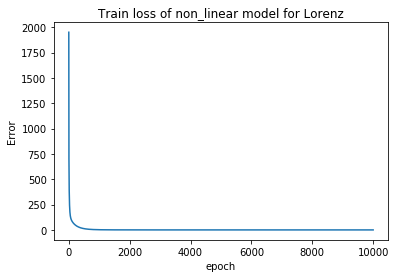

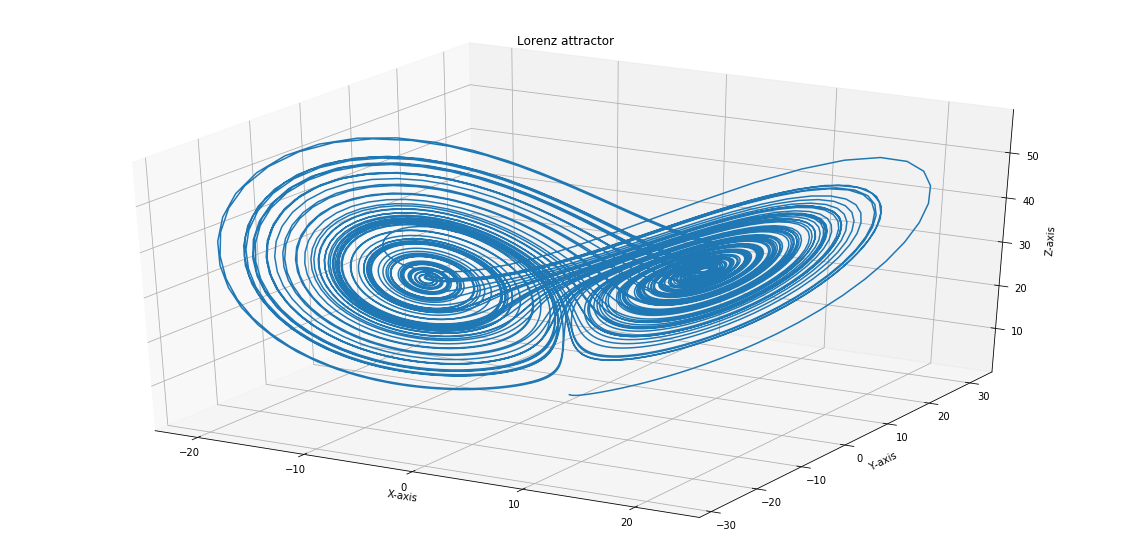

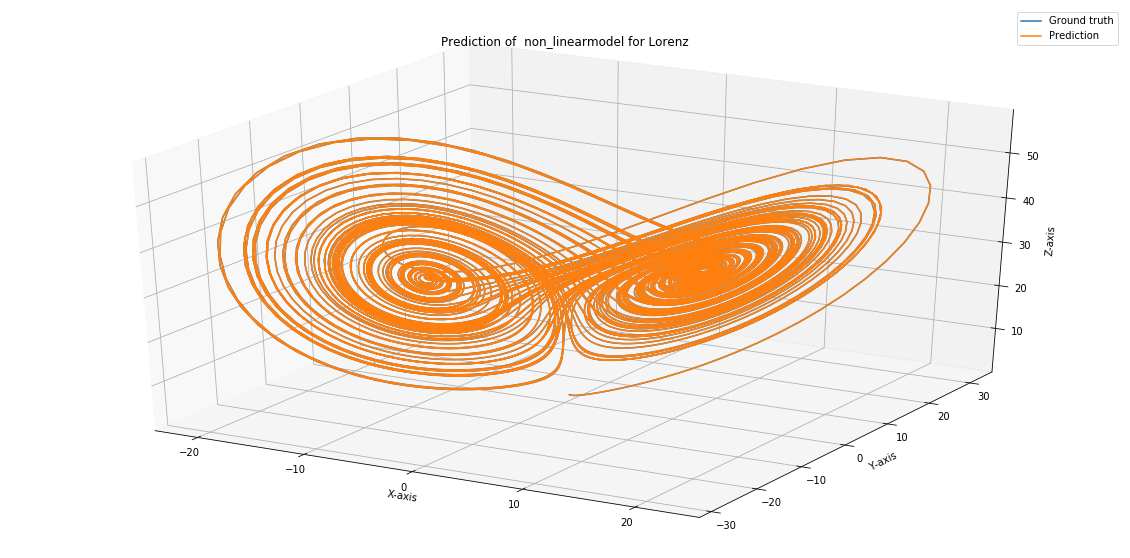

In [2]:
#set model_name = non_linear
import run_lorenz

generate lorenz data:
Parameter:
tensor([[0.9000, 0.1000, 0.0000],
        [0.3000, 0.9900, 0.0000],
        [0.0000, 0.0000, 0.9733]])
tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000, -0.0100],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0100,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]]])
train_x size: torch.Size([10000, 3])
train_y size: torch.Size([10000, 3])


select model to train (non_linear, non_linear_bias):  non_linear_bias


training lorenz with bias
Initial weigths of the matrix:
[Parameter containing:
tensor([[ 0.0931, -0.0092,  0.0074],
        [-0.0042, -0.0506,  0.0028],
        [ 0.0542,  0.0090,  0.0796]], requires_grad=True), Parameter containing:
tensor([0.0265, 0.0824, 0.0919], requires_grad=True), Parameter containing:
tensor([[[ 7.0949e-04,  3.1698e-04, -8.2369e-04],
         [-1.5652e-04, -4.1821e-04,  7.0977e-04],
         [ 4.3351e-04, -1.9308e-04, -6.1185e-04]],

        [[-7.7194e-04, -7.2804e-04,  8.1806e-04],
         [-9.3796e-05,  8.4789e-04, -2.2259e-04],
         [ 4.2182e-04,  2.9345e-04,  2.4624e-04]],

        [[-5.4786e-04,  5.1684e-04,  1.4940e-04],
         [-7.0089e-04, -1.7020e-04, -7.2661e-04],
         [-8.8764e-05, -2.1448e-04, -8.5090e-04]]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.8996,  0.3004,  0.0046],
        [ 0.1002,  0.9897, -0.0022],
        [ 0.0024, -0.0019,  0.8915]], requires_grad=True), Parameter containing:
tenso

<Figure size 432x288 with 0 Axes>

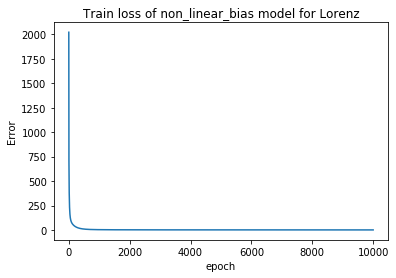

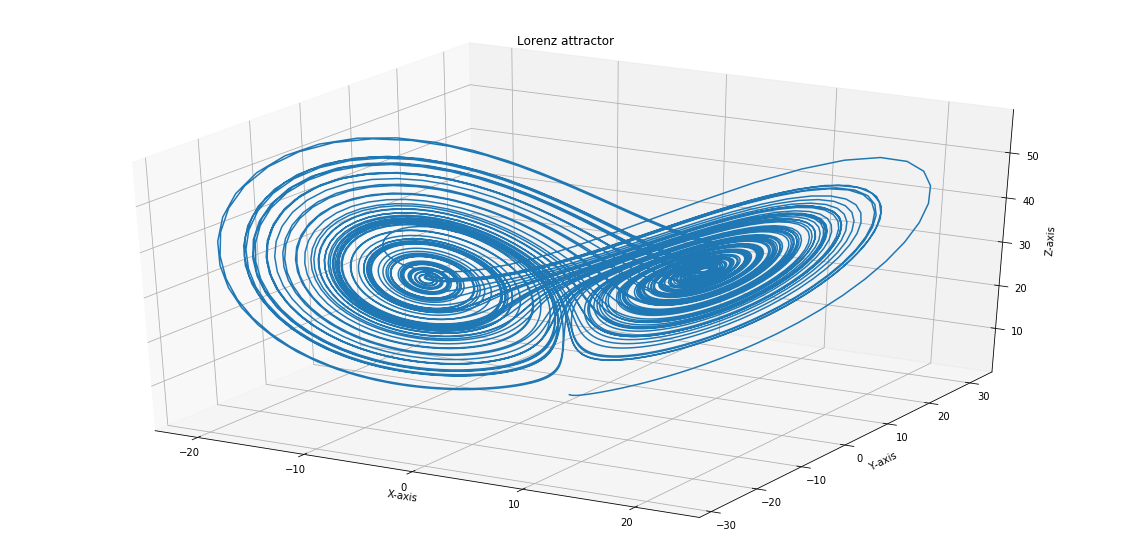

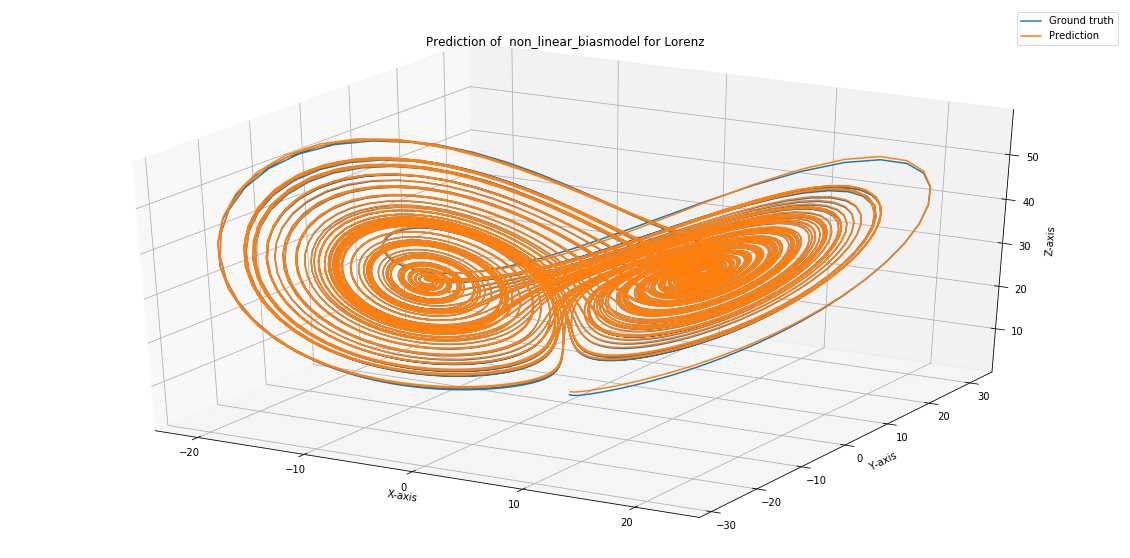

In [2]:
#set model_name = non_linear_bias
import run_lorenz

With or without bias, we observe that the model is converging to the Lorenz attractor system, the bias does not influencethe model prediction since the dominant term is quadratic and then grows exponentially. In the contrary of the pendulum, the Lorenz attractor has a quadratic terms, then there are no explosion point in the model.

### Model analysis with noise
In this part, we analyze the behaviour of the model with noisy lorenz data. We perform forty simulations of the model with different values of selected hyperparameters. Since we add Gaussian with zero-mean and $\sigma^2-$variance. We choose exactly the same hyperparameters and their value as with the pendulum system.

In [ ]:
#If no csv files run this (TAKE A LOT OF TIME)
#set data_name = lorenz
import sim

In [16]:
path_gen = '../gen_data/'
grid_df_lorenz_1000 = pd.read_csv(path_gen + 'lorenz_df_1000.csv')

For the first simulation, we take the accuracy measurement (loss, linear difference, quadratic difference) as a function of noise variance. As with the pendulum, we fix also the number of iterations at $1000$ and the batch size at $10.$

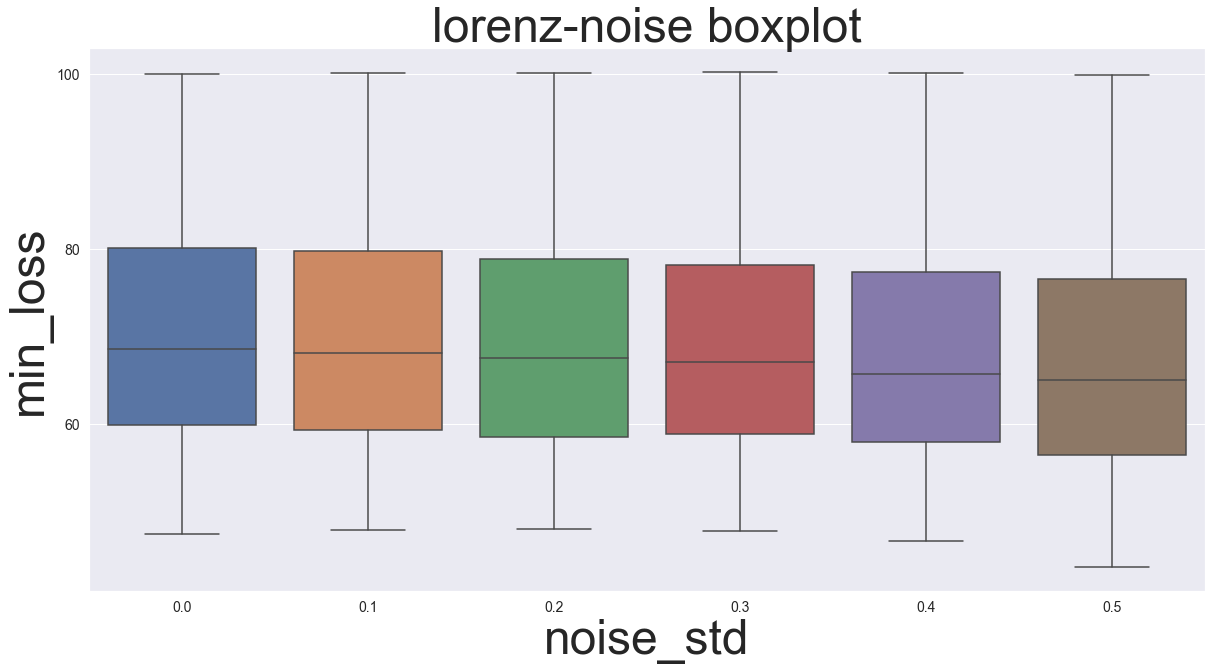

In [17]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='min_loss', save_fig=True, name='lorenz_loss_noise', data_name='lorenz-noise')

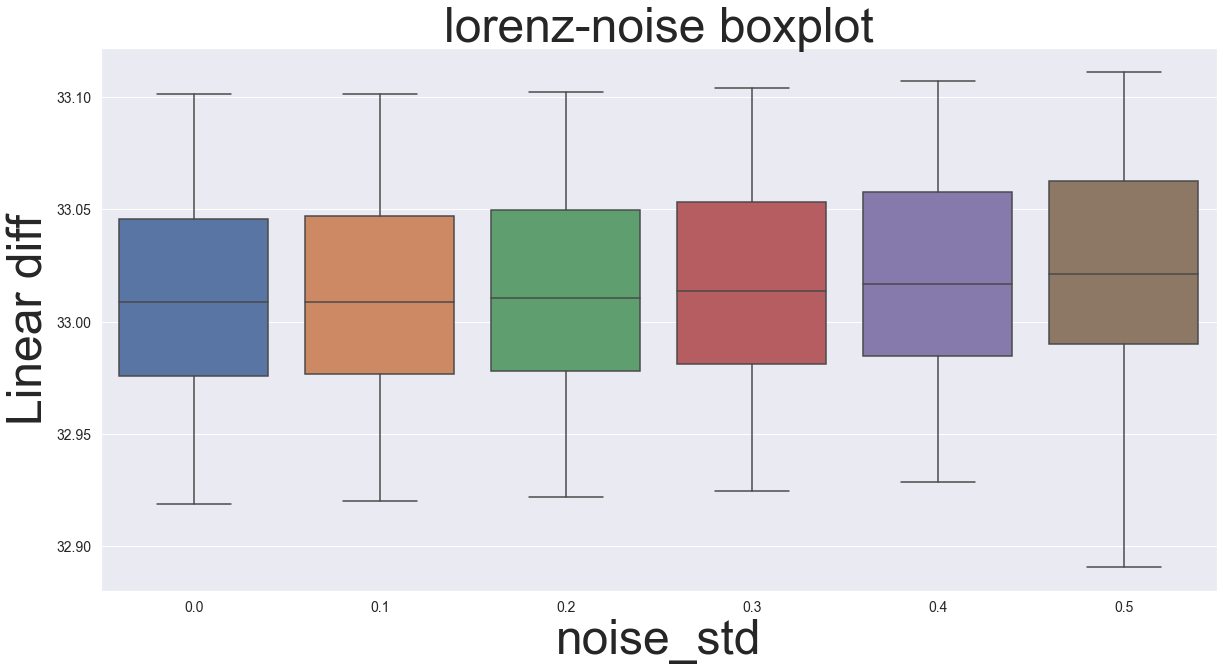

In [18]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Linear diff',  save_fig=True, name='lorenz_lin_noise', data_name='lorenz-noise')

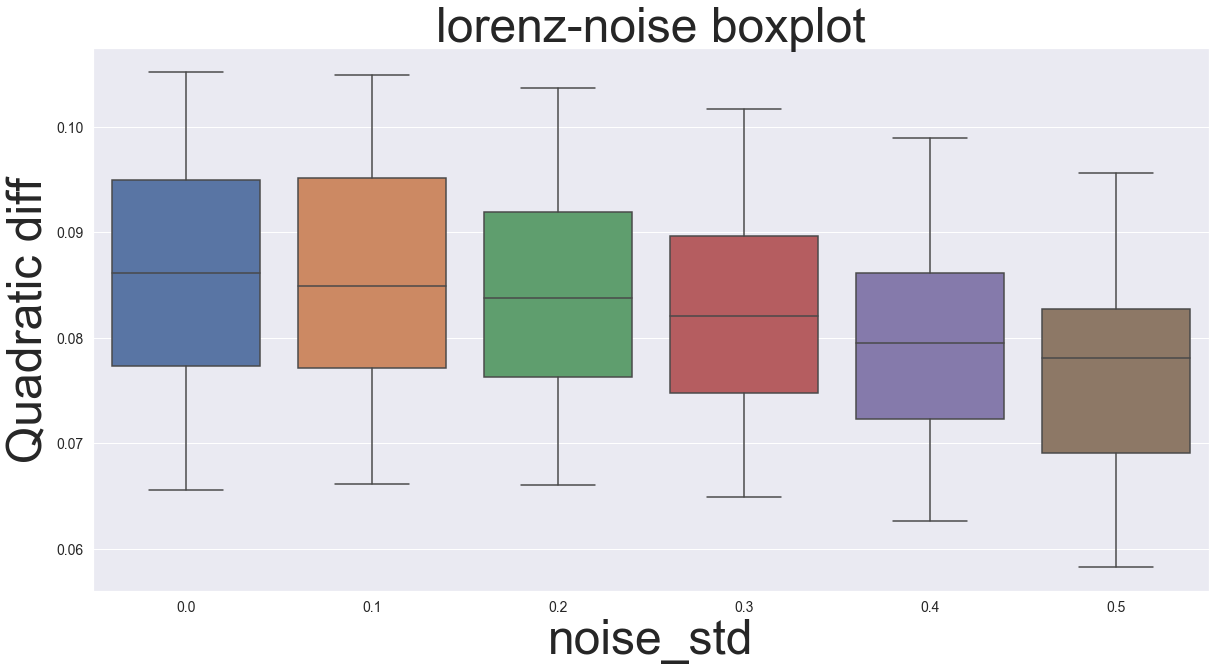

In [19]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Quadratic diff', save_fig=True, name='lorenz_quad_noise', data_name='lorenz-noise')

We observe that the loss and the quadratic term are decreasing as function of tht noise variance, but the linear difference is increasing as funcion of noise variance. We observe that the trend with for the Lorenz attractor is different with respect to the pendulum's trend. The Lorenz attractor has a quadratic terms and not the pendulum. The Lorenz attractor has a non-null tensor for the quadratic term, then the quadratic part of the dynamical system layer converges faster to the non-zero tensor of the Lorenz terms. With the decrease of loss and the quadratic, it is possible to conclude that the model is influenced by the dominant term of the polynomial in the Taylor expansion. With the pendulum, the quadratic difference is constant as function of noise variance and increasing for the linear difference.

The deacreaing of the accuracy measurement confirm the role of the noise as regularizer.

As with the pendulum, we study the accuracy measurement as function of the number of iterations by fixing the noise variance at $0.2$ and the batch size at $10.$

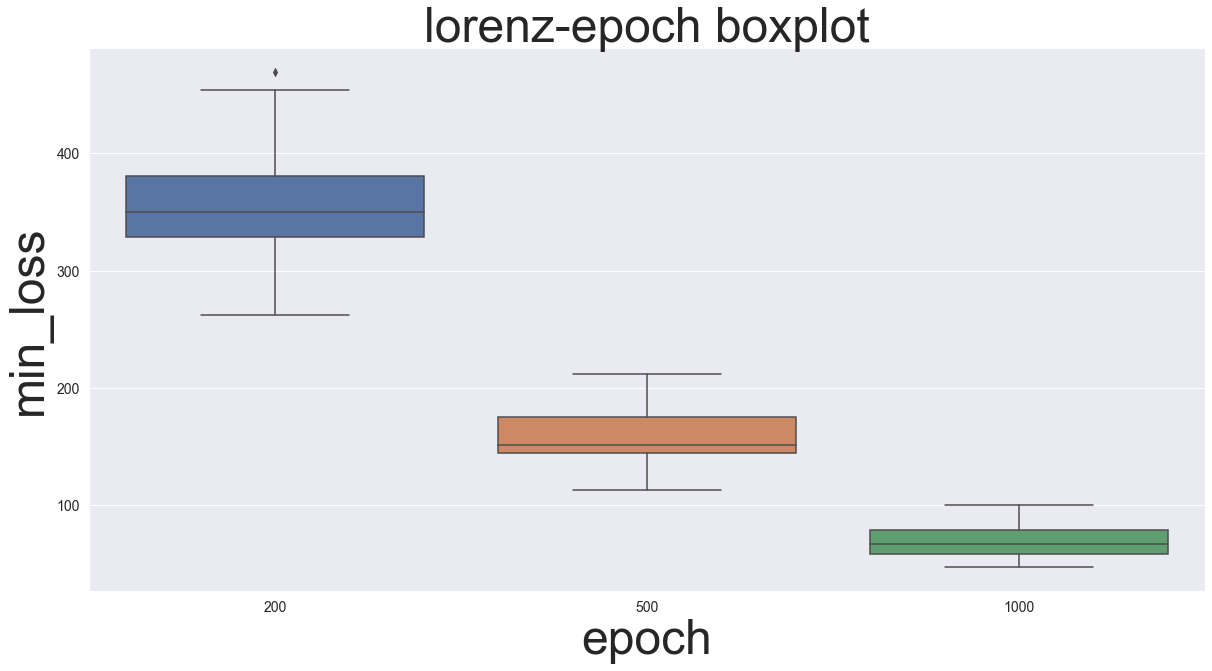

In [20]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='min_loss', save_fig=True, name='lorenz_loss_epoch', data_name='lorenz-epoch')

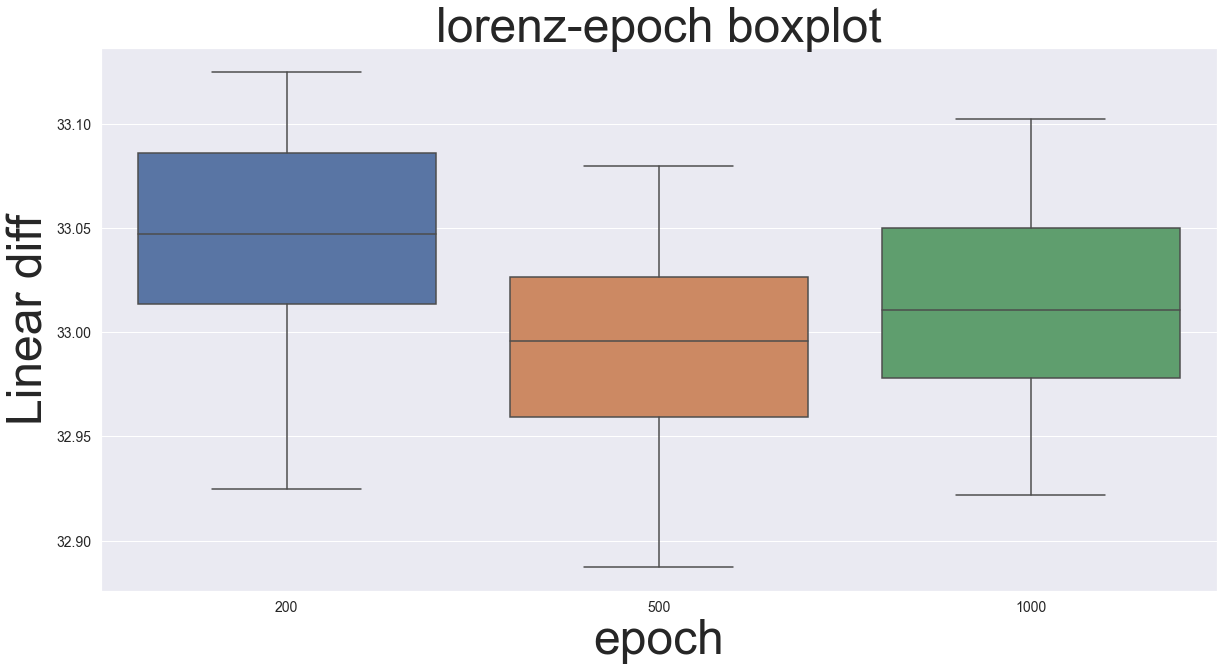

In [21]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Linear diff', save_fig=True, name='lorenz_lin_epoch', data_name='lorenz-epoch')

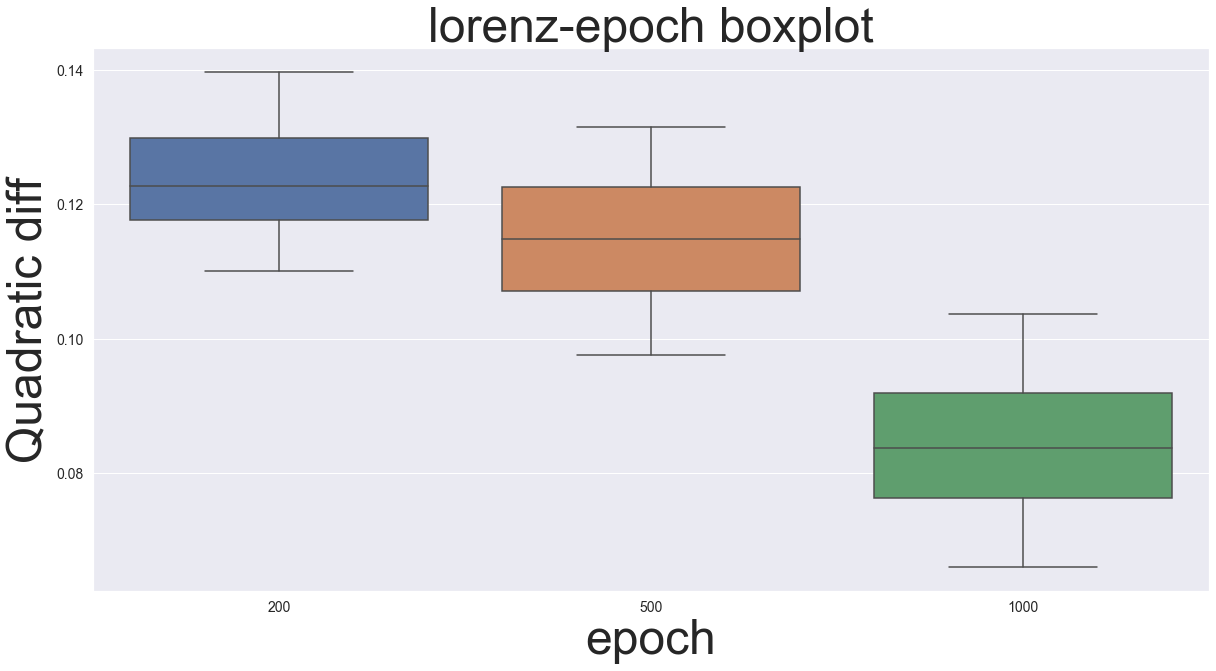

In [22]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Quadratic diff', save_fig=True, name='lorenz_quad_epoch', data_name='lorenz-epoch')

The loss and the quadratic difference deacrease as function of the number of iterations which is not surprising since adding iterations increases the model accuracy, however we observe that the optimal number of iteration is $500.$ This might can be due to the fact that the linear part has difficulties to handle noise, but the model is still converging thanks to the quadratic part which is dominant in the model.

The last step is to treat the accuracy measurements as function of the batch size to conclude and see if our hypothesis is right. We fix the noise variance at $0.2$ and the number of iterations at $1000.$

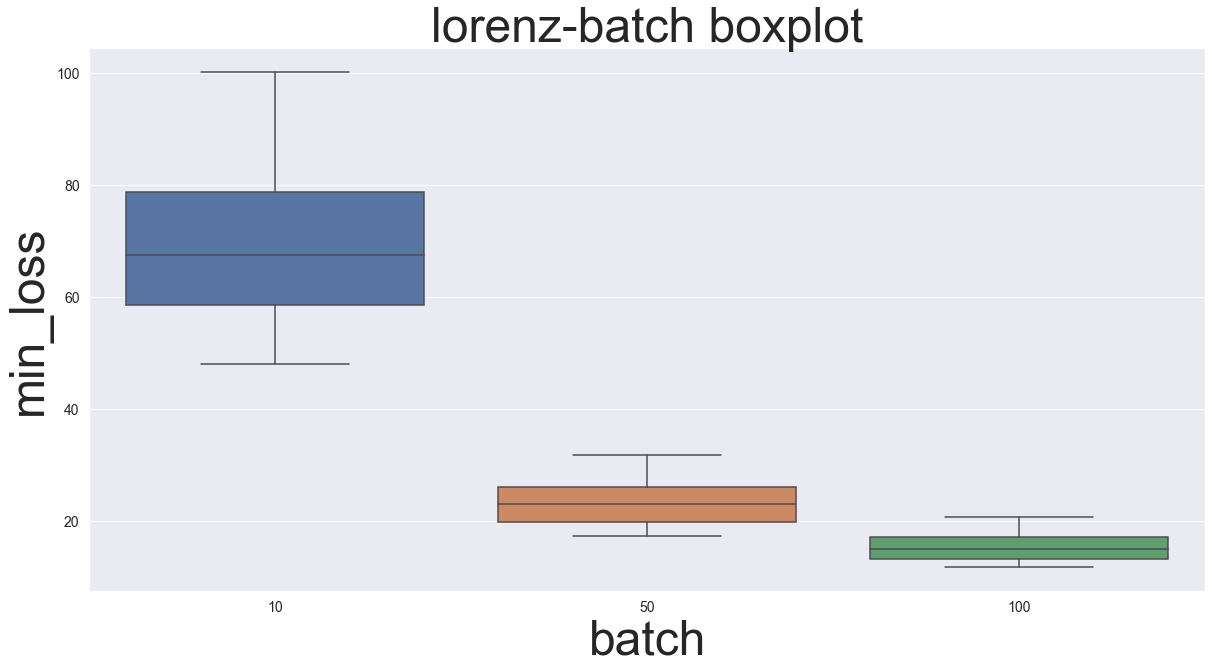

In [23]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='min_loss', save_fig=True, name='lorenz_loss_bs', data_name='lorenz-batch')

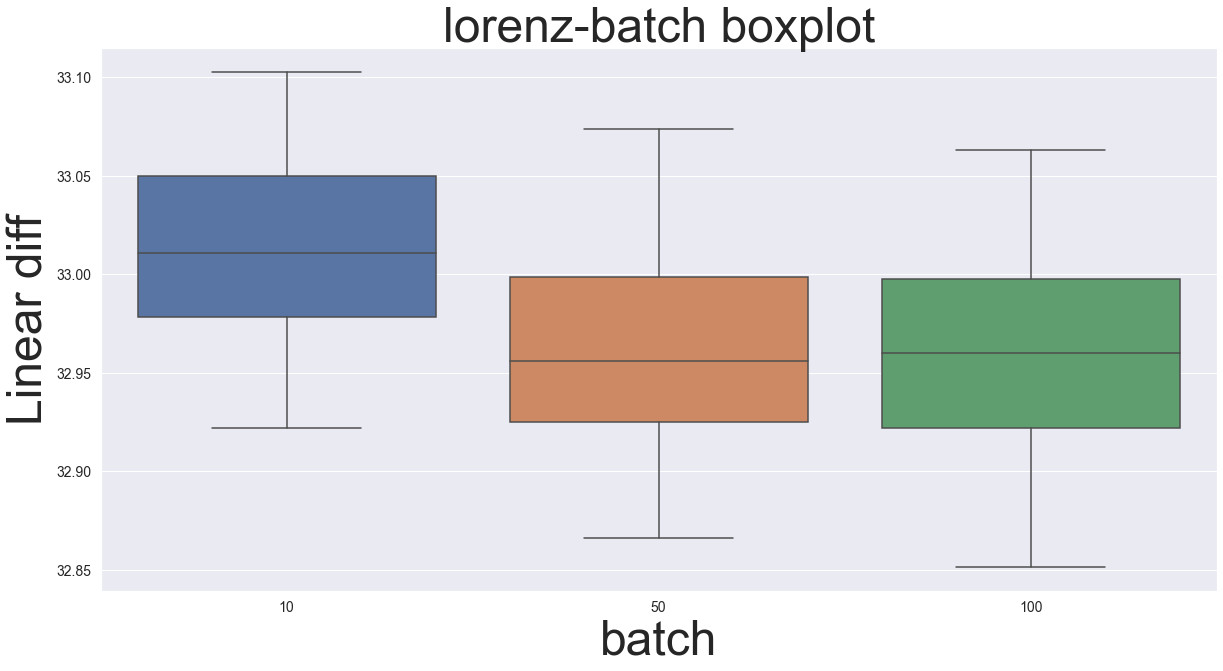

In [24]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Linear diff', save_fig=True, name='lorenz_lin_bs', data_name='lorenz-batch')

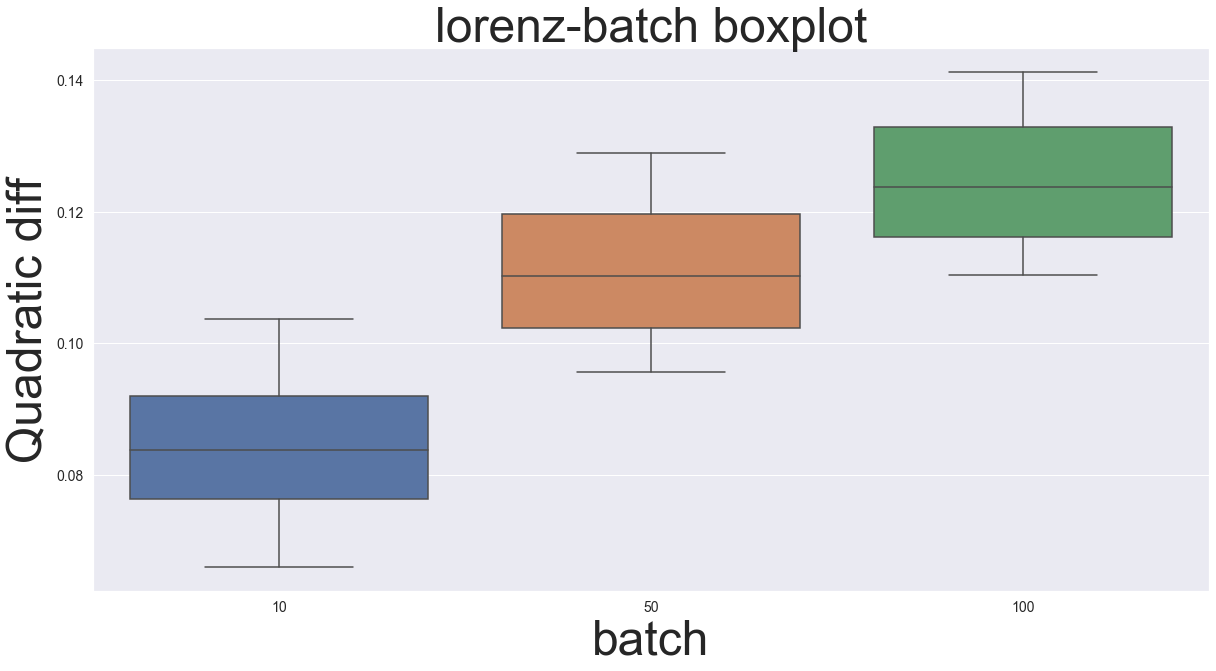

In [25]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Quadratic diff', save_fig=True, name='lorenz_quad_bs', data_name='lorenz-batch')

The behaviour of the accuracy measurements as function of the batch size is completely different from the pendulum. We observe that the minimum loss is reach for a batch size of $100,$ the linear difference stabilize at batch size $50$ and the minimum quadratic difference is at batch size $10.$ With the batch size as feature, the dominant term (quadratic) does not influence the loss evolution. If the batch size is low, the model is not that accurate with respect to the loss value. This is due to the noise in the data and the number of iteration. If we add more value of batch size, the accuracy measurement will increase. We observe also that the minimum linear difference is at $30$ and at $0.13$ for the quadratic difference, this difference is really high. If the batch size is to small, it can contain to much noise and the model fit the noise, then small batch size can lead to overfitting.

## Conclusion
The aim of this new layer is times series forecasting. We use a dynamical system model to predict the time series, by approximating the weight of the system obtained by hte Taylor expansion. This model is able to predict existing dynamical system and is able to deal with noisy data. We observe with this model, the dominant term deterrmines the model behaviour. In our case, the quadratic term determine the model behaviour. In the noise analysis section. we observe that the model has behaviour of typical neural network layer, for example, if we add more iterations, the accuracy of the model increases. The next step is to apply this model to real data. An other to way to build this layer is to use a different basis function such as the Fourier basis. In the noise analysis, we have only considered noise with constant variance. For further works, it will be interesting to see how we can expand the model if the noise variance is a function of time and how the model can treat discontinuous time series. 